**Importing Libraries**

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import keras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Importing DataSet

In [2]:
data_dir = 'BTC-INR.csv'
df = pd.read_csv(data_dir)

**Exploring DataSet**


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-27,1344603.750,1355248.750,1342395.625,1343016.500,1343016.500,1669633033541
1,2022-11-28,1342656.750,1346144.875,1311117.125,1324153.250,1324153.250,2265233262656
2,2022-11-29,1324179.250,1349349.750,1317790.625,1342422.125,1342422.125,1924998924567
3,2022-11-30,1342462.375,1397715.125,1342462.375,1395897.875,1395897.875,2400427532080
4,2022-12-01,1395852.000,1395602.500,1370534.875,1377094.000,1377094.000,1858246065556


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


## DATA PREPROCESSING

Create a dataframe with date and close columns

In [5]:
df = df.groupby('Date')['Close'].mean()
df = pd.DataFrame(df)
df.head()

,Close
Date,
2022-11-27,1343016.500
2022-11-28,1324153.250
2022-11-29,1342422.125
2022-11-30,1395897.875
2022-12-01,1377094.000


In [6]:
df.shape

(366, 1)

**NORMALIZING DATA**

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(df.values).reshape(-1, 1))

**SPLITTING THE DATA**

In [8]:
# 75% to Train , 25% to Test
train_size = int(len(df)*.75)
test_size = len(df) - train_size

print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[ :train_size , 0:1 ]
test_data = scaled_data[ train_size-60: , 0:1 ]

Train Size : 274 Test Size : 92


In [9]:
train_data.shape, test_data.shape

((274, 1), (152, 1))

**Creating Training DataSet**

In [10]:
# Creating a Training set with 60 time-steps and 1 output
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [11]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshaping the input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [13]:
x_train.shape , y_train.shape

((214, 60, 1), (214,))

## LSTM MODEL

**MODEL STRUCTURE**

In [14]:
model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 1)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42,465
Trainable params: 42,465
Non-trainable params: 0
_________________________________________________________________


**MODEL TRAINING**

In [16]:
# Fitting the LSTM to the Training set
callbacks = [EarlyStopping(monitor= 'loss', patience= 10 , restore_best_weights= True)]
history = model.fit(x_train, y_train, epochs= 100, batch_size= 32 , callbacks= callbacks )

Epoch 1/100


2023-11-28 00:14:43.116427: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 2s 35ms/step - loss: 0.0525 - mean_absolute_error: 0.1905
Epoch 2/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0101 - mean_absolute_error: 0.0843
Epoch 3/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0065 - mean_absolute_error: 0.0660
Epoch 4/100
7/7 [==============================] - 0s 33ms/step - loss: 0.0059 - mean_absolute_error: 0.0618
Epoch 5/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0054 - mean_absolute_error: 0.0593
Epoch 6/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0043 - mean_absolute_error: 0.0508
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0042 - mean_absolute_error: 0.0499
Epoch 8/100
7/7 [==============================] - 0s 31ms/step - loss: 0.0044 - mean_absolute_error: 0.0516
Epoch 9/100
7/7 [==============================] - 0s 32ms/step - loss: 0.0043 - mean_absolute_error: 0.0509
Epoch 10/100
7/7 [=============

**MODEL EVALUATION**

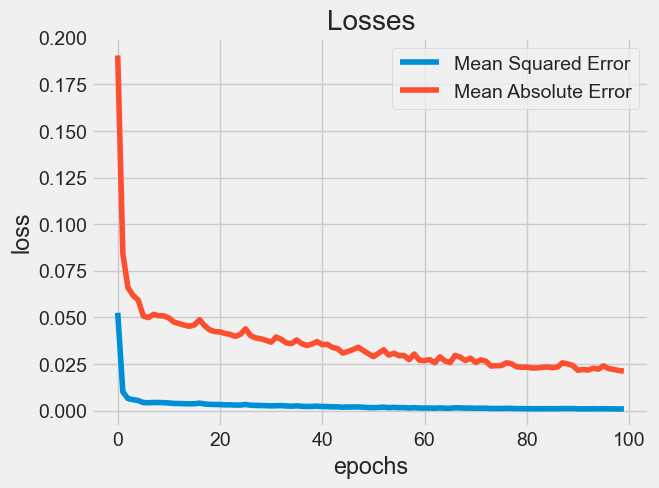

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## PREDICTION

**TESTING SET**

In [18]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
x_test.shape , y_test.shape

((92, 60, 1), (92,))

In [20]:
#inverse y_test scaling
predictions = model.predict(x_test)

#inverse predictions scaling
predictions = scaler.inverse_transform(predictions)
predictions.shape

3/3 [==============================] - 0s 8ms/step


(92, 1)

**ROOT MEAN SQUARE ERROR**

In [21]:
#inverse y_test scaling
y_test = scaler.inverse_transform([y_test])

RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

19538.04

## VISUALIZE PREDICTIONS WITH DATA

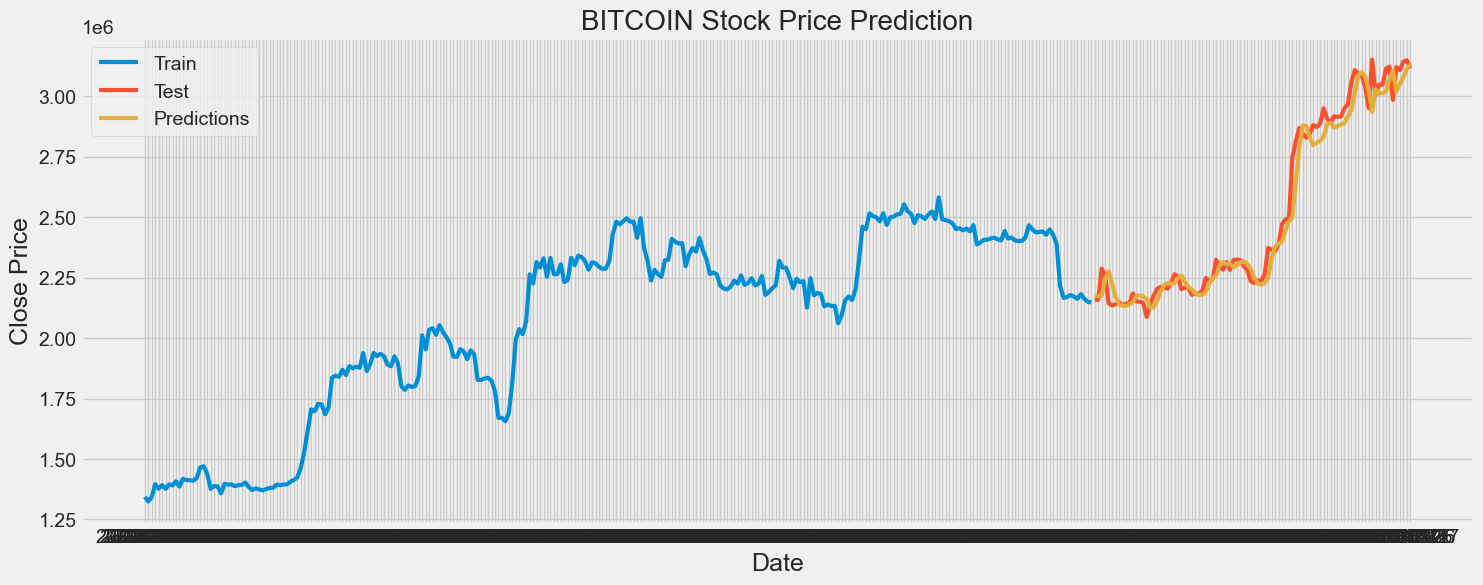

In [22]:
train = df.iloc[:train_size , 0:1]
test = df.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('BITCOIN Stock Price Prediction', fontsize= 20)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price', fontsize= 18)
plt.plot(train['Close'], linewidth= 3)
plt.plot(test['Close'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

In [23]:
from datetime import timedelta

In [24]:
def insert_end(Xin, new_input):
    timestep = 60
    for i in range(timestep - 1):
        Xin[:, i, :] = Xin[:, i+1, :]
    Xin[:, timestep - 1, :] = new_input
    return Xin

In [25]:
future = 30
forcast = []
Xin = x_test[-1 :, :, :]
time = []
for i in range(0, future):
    out = model.predict(Xin, batch_size=5)
    forcast.append(out[0, 0]) 
    print(forcast)
    Xin = insert_end(Xin, out[0, 0]) 
    time.append(pd.to_datetime(df.index[-1]) + timedelta(days=i))

1/1 [==============================] - 0s 16ms/step
[0.9894171]
1/1 [==============================] - 0s 16ms/step
[0.9894171, 0.9835419]
1/1 [==============================] - 0s 16ms/step
[0.9894171, 0.9835419, 0.97228533]
1/1 [==============================] - 0s 15ms/step
[0.9894171, 0.9835419, 0.97228533, 0.9580645]
1/1 [==============================] - 0s 15ms/step
[0.9894171, 0.9835419, 0.97228533, 0.9580645, 0.94220626]
1/1 [==============================] - 0s 16ms/step
[0.9894171, 0.9835419, 0.97228533, 0.9580645, 0.94220626, 0.92585355]
1/1 [==============================] - 0s 17ms/step
[0.9894171, 0.9835419, 0.97228533, 0.9580645, 0.94220626, 0.92585355, 0.9099731]
1/1 [==============================] - 0s 17ms/step
[0.9894171, 0.9835419, 0.97228533, 0.9580645, 0.94220626, 0.92585355, 0.9099731, 0.89529437]
1/1 [==============================] - 0s 16ms/step
[0.9894171, 0.9835419, 0.97228533, 0.9580645, 0.94220626, 0.92585355, 0.9099731, 0.89529437, 0.88228136]
1/1 [====

In [26]:
time

[Timestamp('2023-11-27 00:00:00'),
 Timestamp('2023-11-28 00:00:00'),
 Timestamp('2023-11-29 00:00:00'),
 Timestamp('2023-11-30 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2023-12-02 00:00:00'),
 Timestamp('2023-12-03 00:00:00'),
 Timestamp('2023-12-04 00:00:00'),
 Timestamp('2023-12-05 00:00:00'),
 Timestamp('2023-12-06 00:00:00'),
 Timestamp('2023-12-07 00:00:00'),
 Timestamp('2023-12-08 00:00:00'),
 Timestamp('2023-12-09 00:00:00'),
 Timestamp('2023-12-10 00:00:00'),
 Timestamp('2023-12-11 00:00:00'),
 Timestamp('2023-12-12 00:00:00'),
 Timestamp('2023-12-13 00:00:00'),
 Timestamp('2023-12-14 00:00:00'),
 Timestamp('2023-12-15 00:00:00'),
 Timestamp('2023-12-16 00:00:00'),
 Timestamp('2023-12-17 00:00:00'),
 Timestamp('2023-12-18 00:00:00'),
 Timestamp('2023-12-19 00:00:00'),
 Timestamp('2023-12-20 00:00:00'),
 Timestamp('2023-12-21 00:00:00'),
 Timestamp('2023-12-22 00:00:00'),
 Timestamp('2023-12-23 00:00:00'),
 Timestamp('2023-12-24 00:00:00'),
 Timestamp('2023-12-

**CREATE FORECASTED DATAFRAME**



In [27]:
forcasted_output = np.asanyarray(forcast)   
forcasted_output = forcasted_output.reshape(-1, 1) 
forcasted_output = scaler.inverse_transform(forcasted_output) 

In [28]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output], axis=1)
df_result.columns = "Date", "Forecasted"

**FORECASTED PRICE**

In [29]:
df_result

,Date,Forecasted
0,2023-11-27,3131812.25
1,2023-11-28,3121078.50
2,2023-11-29,3100512.75
3,2023-11-30,3074531.50
4,2023-12-01,3045558.25
5,2023-12-02,3015682.25
6,2023-12-03,2986668.75
7,2023-12-04,2959850.75
8,2023-12-05,2936076.00
9,2023-12-06,2915724.25


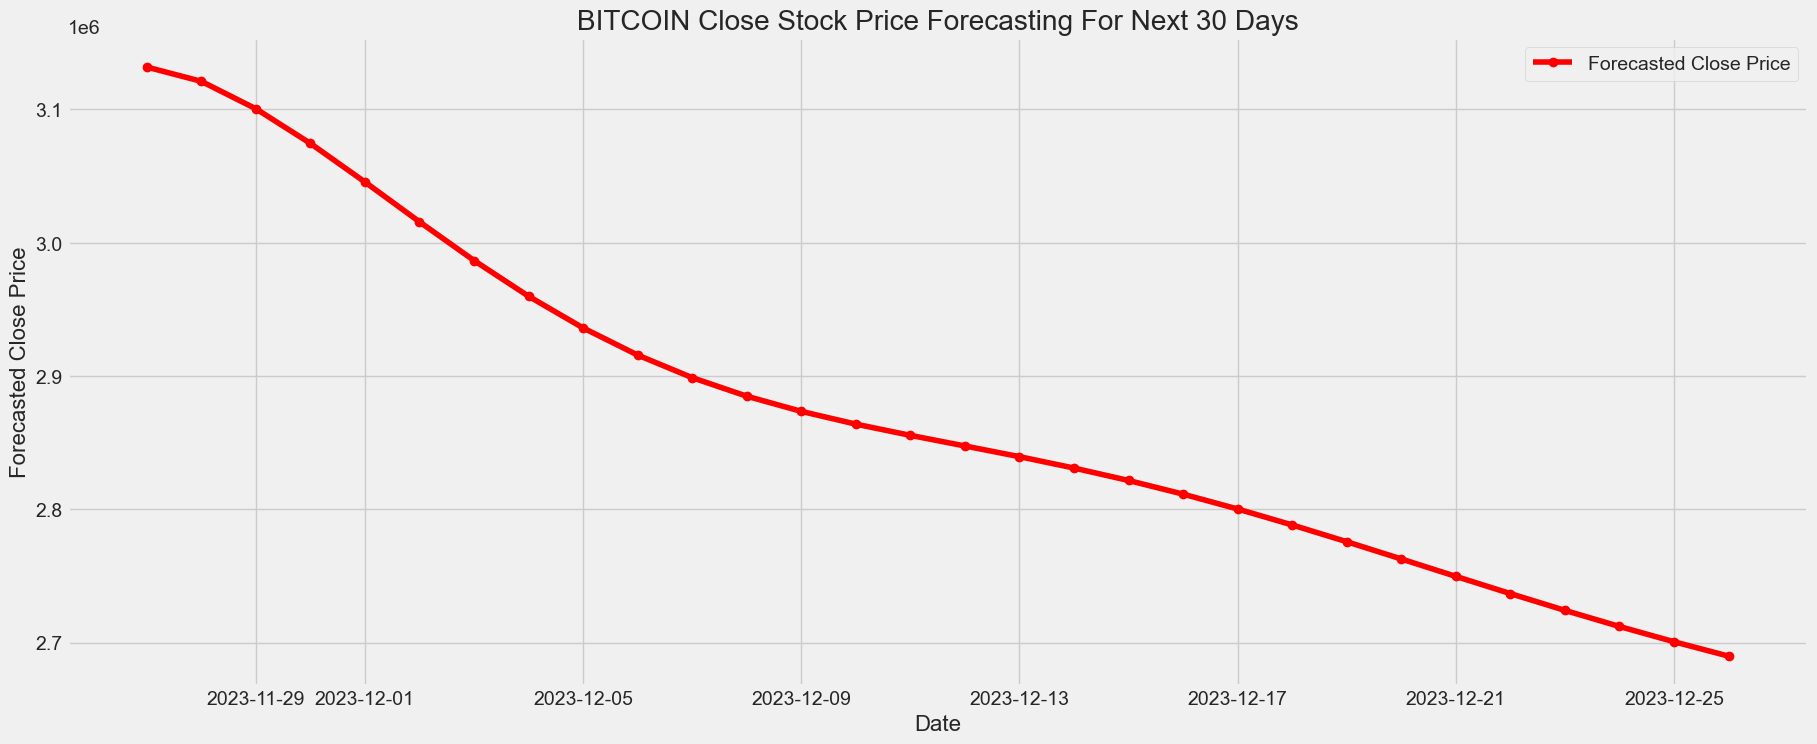

In [37]:
df_result['Date'] = pd.to_datetime(df_result['Date'])

plt.figure(figsize=(20, 8))
plt.title('BITCOIN Close Stock Price Forecasting For Next 30 Days')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Forecasted Close Price', fontsize=16)

plt.plot(df_result['Date'], df_result['Forecasted'], marker='o',color='red', label='Forecasted Close Price')
plt.legend()
plt.grid(True)
plt.show()
